In [221]:
%reload_ext autoreload
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import xarray as xr
import pyproj
import osr
import datetime
import subprocess
import shutil
import numpy as np
import glob
import sys
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [295]:
#Choose how to name the file
series = 'trmm' #choose trmm or chirps
reducer = 'mean' #choose mean, p5, p50 or p95
# region = 'bonou' #choose south or bonou
# name_out = "\{0}_{1}_{2}".format(region,series,reducer)
name_out = "\{0}_{1}".format(series,reducer)
name_out

'\\trmm_mean'

When loading new data:

In [292]:
# #import all csv files from folder in Google Drive
# # SET THE RIGHT PATH
# path = r'C:\Users\908138\Google Drive\studie\graduation\08_database\precipitation\trmm_bonou'

# with open('csv_merged.csv', 'wb') as outfile:
#     for i, fname in enumerate(allFiles):
#         with open(fname, 'rb') as infile:
#             if i != 0:
#                 infile.readline()  # Throw away header on all but first file
#             # Block copy rest of file from input to output without parsing
#             shutil.copyfileobj(infile, outfile)
# #             for files in pathsource:
# #                 if files.endswith("*.csv"):
# #                     shutil.copy(files,path) 
#             print(fname + " has been imported.")

In [294]:
# # Move merged csv from github folder to precipitation database
# pathsource = ("C:\\Users\\908138\\githubmain\\GEE-CHIRPS" + "\\csv_merged.csv")
# pathdestination = ("C:\\Users\\908138\\githubdata\\precipitation" + name_out + ".csv")
# shutil.move(pathsource,pathdestination)

When adding new data to the file:

In [204]:
# #Use this to import a specific column into the csv file

# #import all csv files from folder in Google Drive
# # SET THE RIGHT PATH
# path = r'C:\Users\908138\Google Drive\studie\graduation\08_database\precipitation\trmm_south'

# with open('csv_merged_add.csv', 'wb') as outfile:
#     for i, fname in enumerate(allFiles):
#         with open(fname, 'rb') as infile:
#             if i != 0:
#                 infile.readline()  # Throw away header on all but first file
#             # Block copy rest of file from input to output without parsing
#             shutil.copyfileobj(infile, outfile)
# #             for files in pathsource:
# #                 if files.endswith("*.csv"):
# #                     shutil.copy(files,path) 
#             print(fname + " has been imported.")

# fields = ['','undefined']
# df = pd.read_csv('csv_merged_add.csv', skipinitialspace=True, usecols = )

In [205]:

# #merge bonou and south datasets
# file1 = ("C:\\Users\\908138\\githubmain\\GEE-CHIRPS" + "\\csv_merged_1.csv")
# file2 = ("C:\\Users\\908138\\githubmain\\GEE-CHIRPS" + "\\csv_merged_2.csv")

# df = pd.read_csv(pathdestination,skiprows=1)#, index_col='date',names=['date','precipitation'])
# df.columns = ['date','precipitation']
# df['date'] = pd.to_datetime(df['date'])

# merged = pd.concat([file1,file2])
# merged


In [206]:
# # Move merged csv from github folder to precipitation database
# pathsource = ("C:\\Users\\908138\\githubmain\\GEE-CHIRPS" + "\\csv_merged.csv")
# pathdestination = ("C:\\Users\\908138\\githubdata\\precipitation" + name_out + ".csv")
# shutil.move(pathsource,pathdestination)

In [297]:
# read (merged) csv file in githubdata folder
pathdestination = ("C:\\Users\\908138\\githubdata\\precipitation" + name_out + ".csv")
df = pd.read_csv(pathdestination,skiprows=1)#, index_col='date',names=['date','precipitation'])
df.columns = ['date','precipitation']
df['date'] = pd.to_datetime(df['date'])

# Set index
df = df.set_index(df['date'])
# Select observations between two datetimes

# Filter by date
date_start = '2005-1-10 00:00:00'
date_end = '2005-1-13 00:00:00'
df = df.loc[date_start:date_end]

date = df[['date']]
precipitation = df[['precipitation']]
df

,date,precipitation
date,,
2005-01-10,2005-01-10,0.000
2005-01-10,2005-01-10,0.006
2005-01-10,2005-01-10,0.000
2005-01-10,2005-01-10,0.000
2005-01-10,2005-01-10,0.000
2005-01-10,2005-01-10,0.000
2005-01-10,2005-01-10,0.000
2005-01-10,2005-01-10,0.000
2005-01-11,2005-01-11,0.000


In [298]:
# Use this to add a data to the file

# TO DO: 1. IMPORT MERGE FILES, 2. READ SPECIFIC COLUMN FROM FILE 3. ADD TO EXISTING FILE

# #Use this to import a specific column into the csv file

# #import all csv files from folder in Google Drive
# # SET THE RIGHT PATH
# path = r'C:\Users\908138\Google Drive\studie\graduation\08_database\precipitation\trmm_south'

# with open('csv_merged_add.csv', 'wb') as outfile:
#     for i, fname in enumerate(allFiles):
#         with open(fname, 'rb') as infile:
#             if i != 0:
#                 infile.readline()  # Throw away header on all but first file
#             # Block copy rest of file from input to output without parsing
#             shutil.copyfileobj(infile, outfile)
# #             for files in pathsource:
# #                 if files.endswith("*.csv"):
# #                     shutil.copy(files,path) 
#             print(fname + " has been imported.")

# fields = ['','undefined']
# df = pd.read_csv('csv_merged_add.csv', skipinitialspace=True, usecols = )

# df['south'] = ()

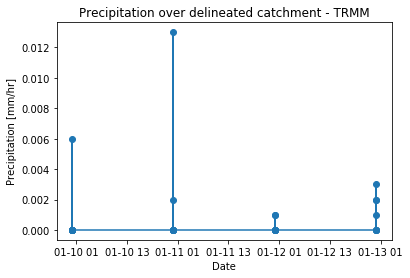

In [300]:
#Plot the Figure
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Precipitation over delineated catchment - TRMM')

ax.set_xlabel('Date')
ax.set_ylabel('Precipitation [mm/hr]')
ax.plot(date,precipitation, linestyle='-', marker='o')


plt.show()

In [279]:
df

,date,precipitation,ma
date,,,
2005-01-10,2005-01-10,0.000,NaN
2005-01-10,2005-01-10,0.006,NaN
2005-01-10,2005-01-10,0.000,NaN
2005-01-10,2005-01-10,0.000,NaN
2005-01-10,2005-01-10,0.000,NaN
2005-01-10,2005-01-10,0.000,NaN
2005-01-10,2005-01-10,0.000,NaN
2005-01-10,2005-01-10,0.000,0.000750
2005-01-11,2005-01-11,0.000,0.000750


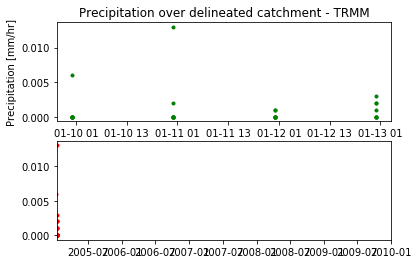

In [299]:
# MOVING AVERAGE
df['ma'] = precipitation.rolling(8).mean()
# df

#Plot the Figure
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.set_title('Precipitation over delineated catchment - TRMM')

ax1.set_xlabel('Date')
ax1.set_ylabel('Precipitation [mm/hr]')
ax1.plot(date,precipitation, '.g')

ax2 = fig.add_subplot(212)
ax2.set_xlim(pd.Timestamp('2005-01-11', pd.Timestamp('2005-01-14')))
ax2.plot(date,precipitation, '.r')

plt.show()

In [ ]:


# TO DO: importing the files as  a dataset - pandas, data als datetime
# TO DO: plotting one graph with various entries (Bonou/South; mean/p5/p50/p95)